<a href="https://colab.research.google.com/github/Yog2002/Hotel_Booking_Analyasis/blob/main/Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
# **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**
# **Explore and analyze the data to discover important factors that govern the bookings.** 

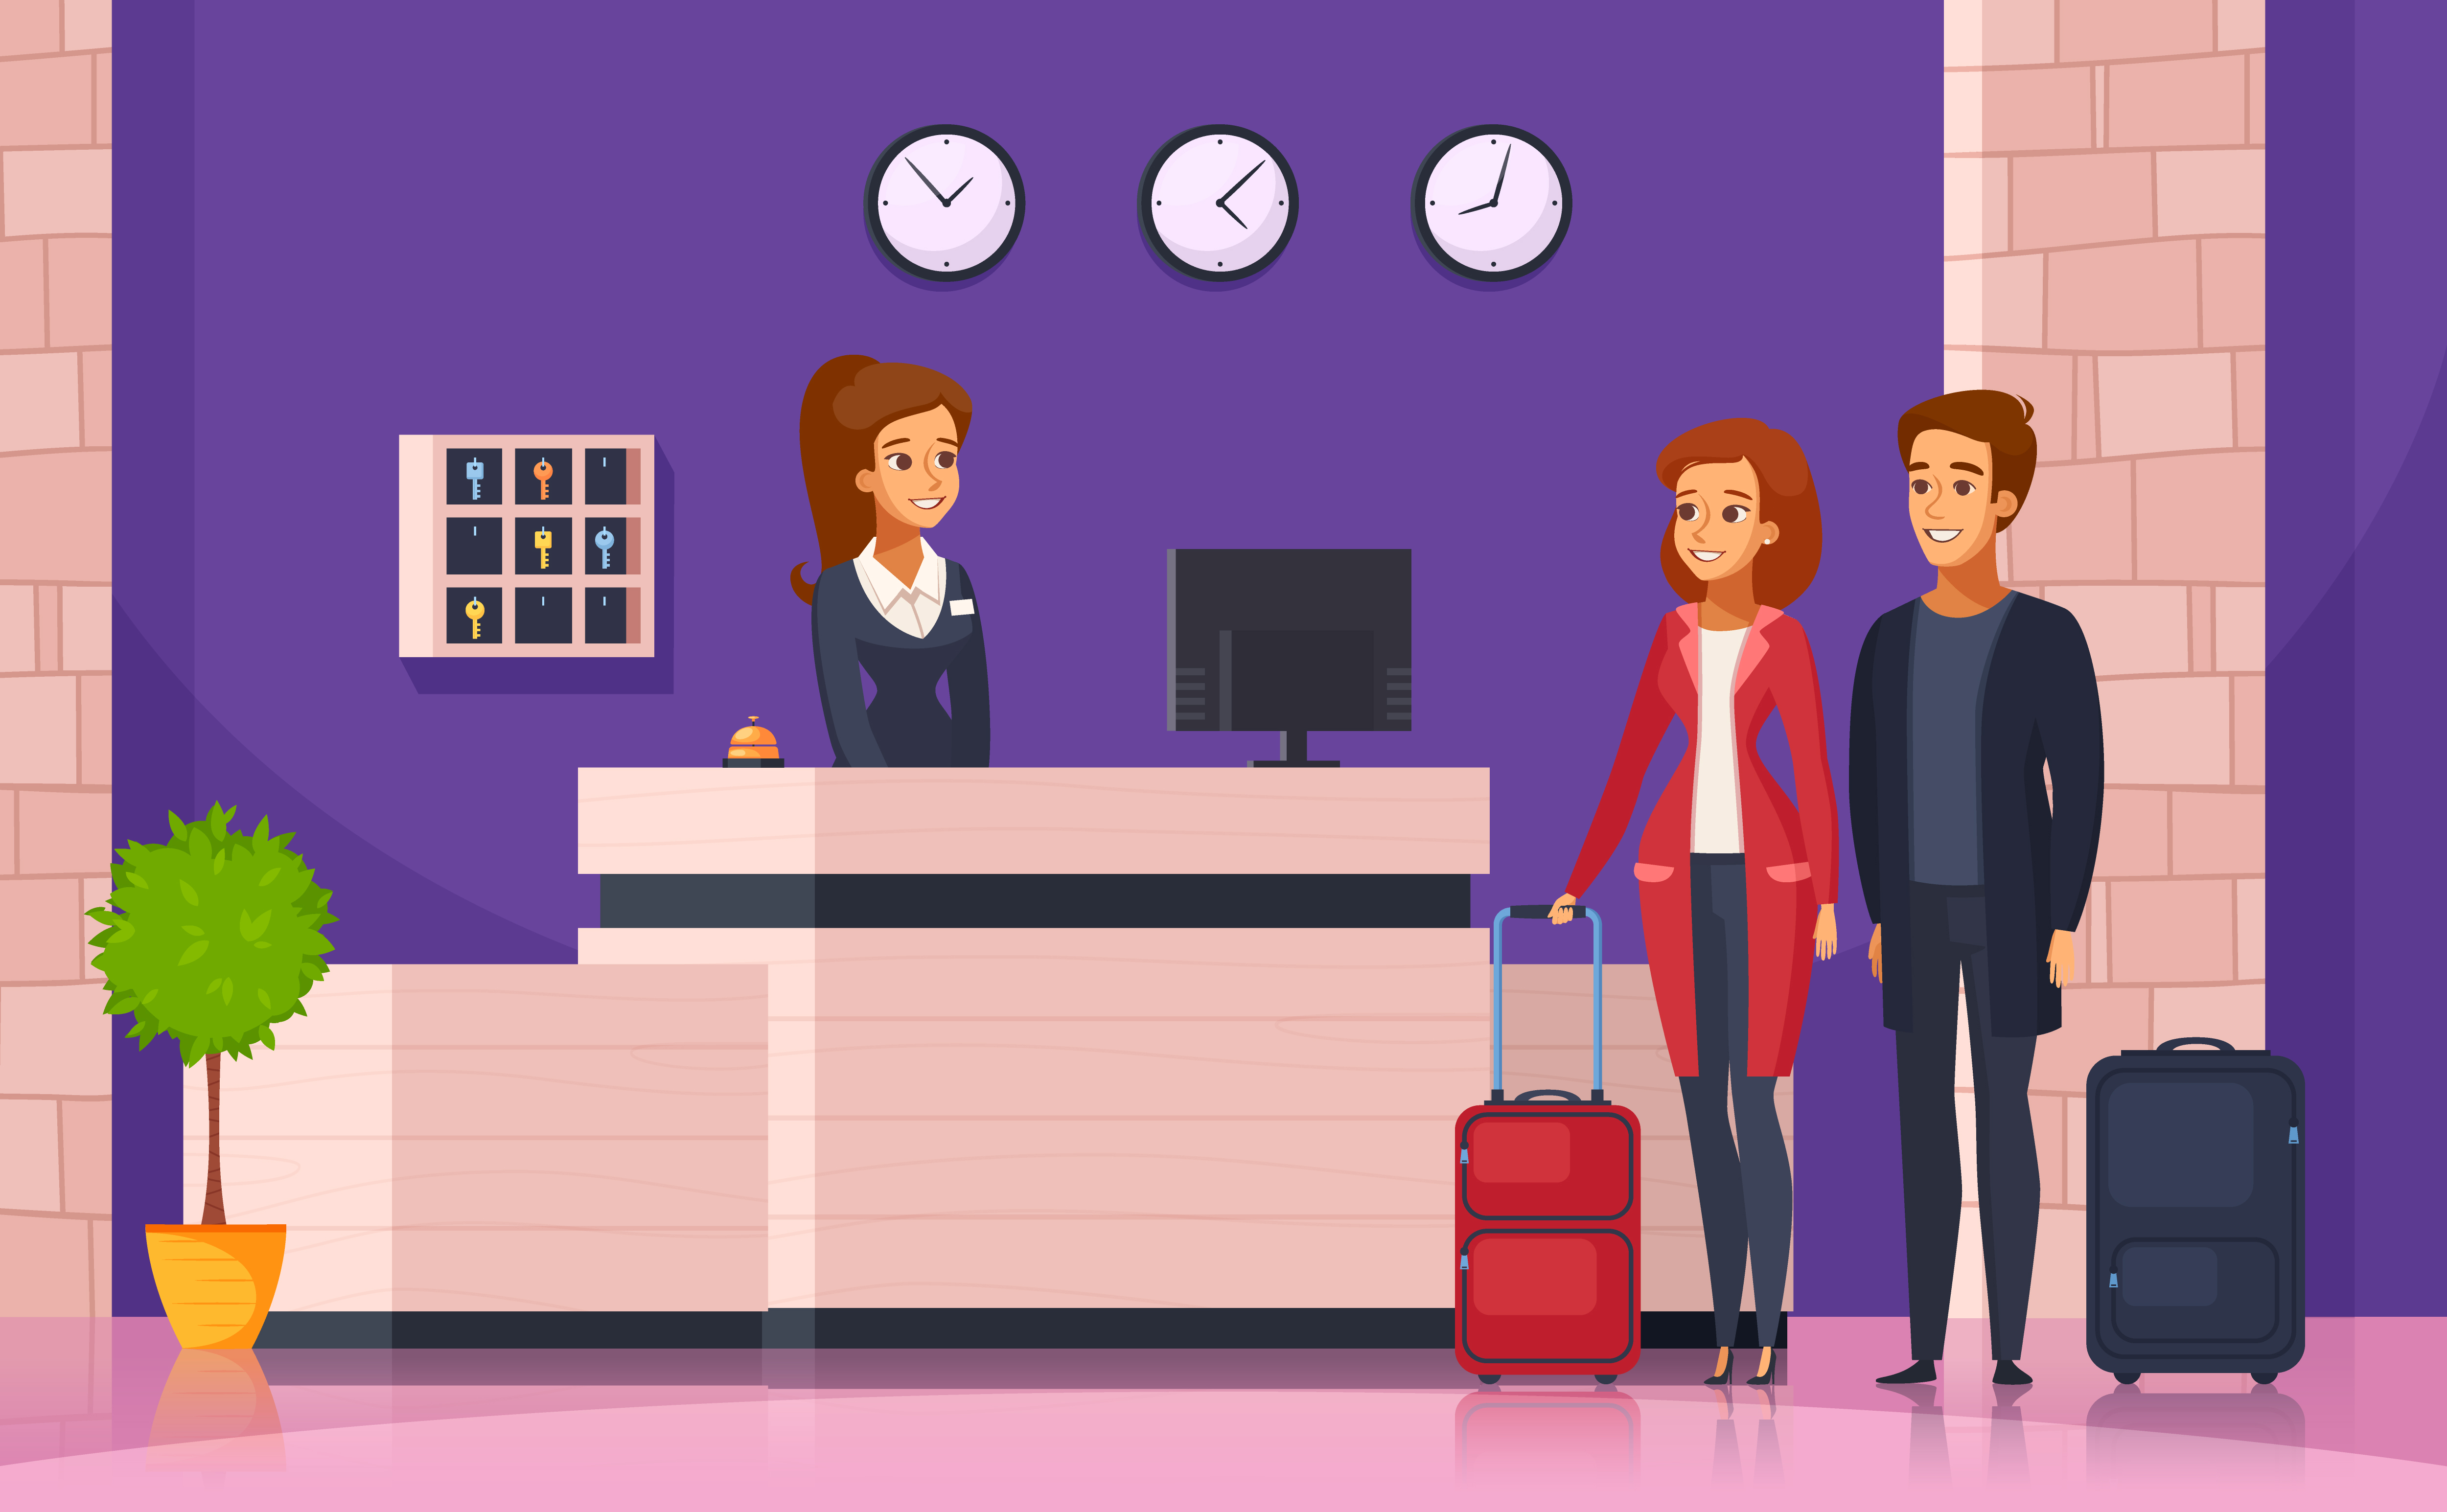

> Indented block



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

In [ ]:
# Importing Data
data=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone_Project 1/Hotel Bookings.csv')

In [ ]:
# Copy the dataset
df = data.copy()

In [ ]:
# Show the first 5 rows of Data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Data Preprocessing**

1. Find Missing Values
2. Dealing with Missing values
3. Type Casting (if Required)




In [ ]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# **1. Dealing with Missing Values**

In [ ]:
# If no id of agent or company is null, just replace it with 0
df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [ ]:
# For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(data.country.mode().to_string(), inplace=True)


# for missing children value, replace it with rounded mean value
df['children'].fillna(round(data.children.mean()), inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# **1.Converting Datatype**


**Let’s check the datatype of each column in our dataset.**

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

# **Exploratory Data Analysis**

# **Heatmap**

Lets first find the correlation between the numerical data.

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [ ]:
num_data = data[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces']]

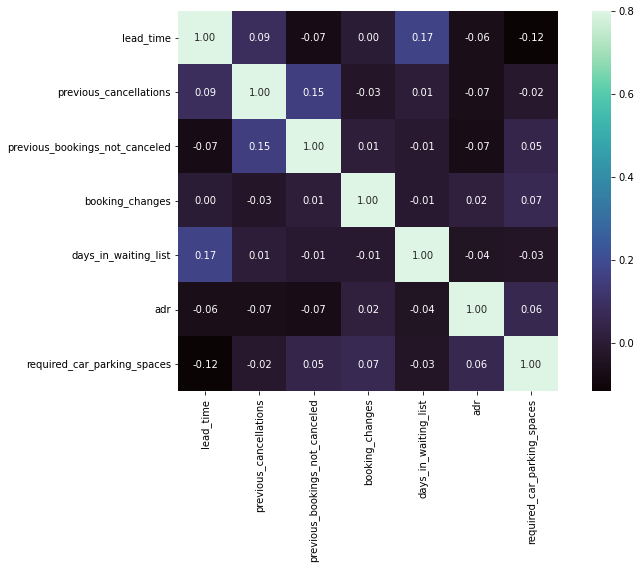

In [ ]:
#correlation matrix
corrmat = num_data.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True,cmap ='mako');

This is not a highly correlated data. So by seeing heatmap we are not able to find any highly correlated columns.Still we are able to find out two results from above heatmap:

1.Lead time and total stay have slight correlation. This means when people want to stay little longer they plan little before than actual arrival.

2.Total guests and adr has some correlation. This means the when the number of guests increases, adr will also increase.

#**Univariate Analysis**

#**Q.1 Which type of hotel is most liked by customers ?**

**Ans : City Hotel is most liked by customers as compare to Resort Hotel.**

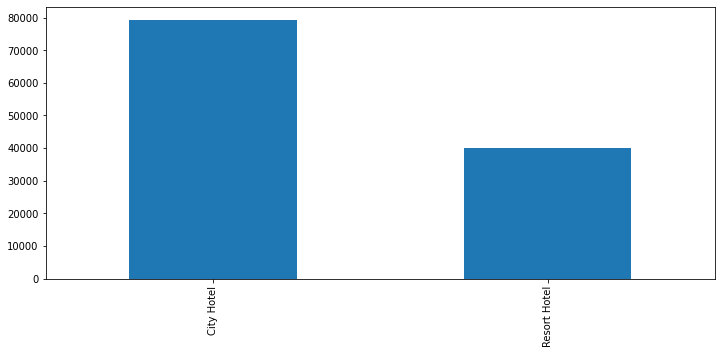

In [ ]:
#df.hotel.value_counts()
plt.figure(figsize=(12,5))
df.hotel.value_counts().plot.bar()


# **Q.2 In which months hotel is more busy ?**

**Ans : In "Aug" month the hotel were busy.**

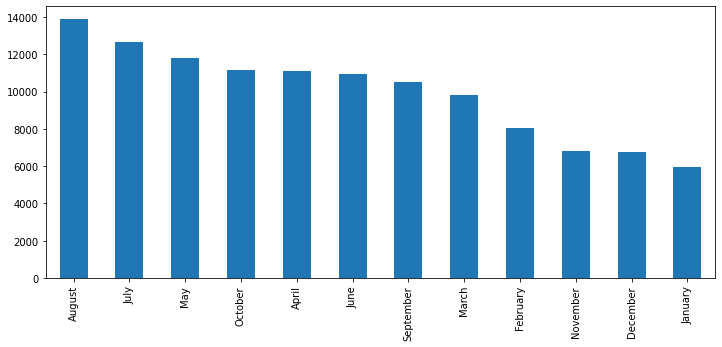

In [ ]:
#df.arrival_date_month.value_counts()
plt.figure(figsize=(12,5))
df.arrival_date_month.value_counts().plot.bar()

# **Q.3 Which meal type is most preffered meal of customers?**

**Ans : Most preferred meal type is BB (Bed and breakfast).**

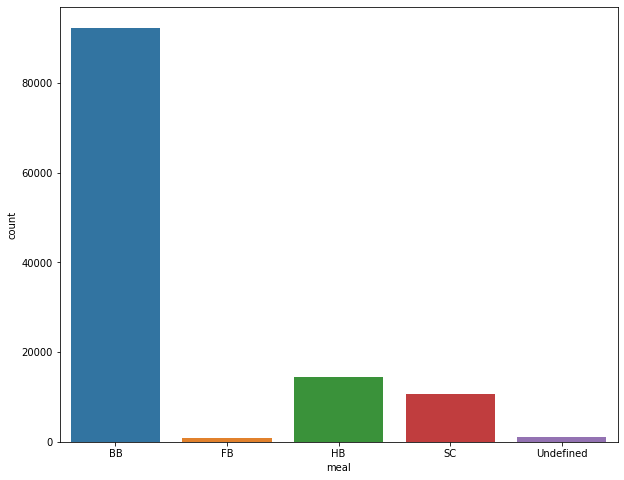

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df['meal'])
plt.show()

#**Distribution Channel wise Analysis**

#**Q.4 Which is the most common channel for booking hotels?**

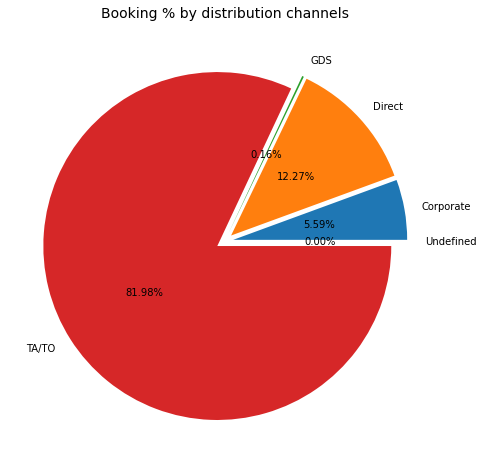

In [ ]:
group_by_dc = df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);


# **Q.5 Which channel is mostly used for early booking of hotels?**

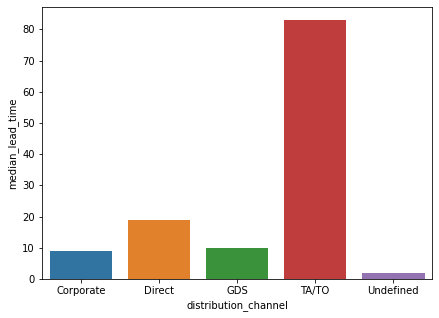

In [ ]:
group_by_dc = df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()


# **Booking cancellation Analysis**

**Let us try to understand what causes the people to cancel the booking.**

# **Q.6 Which significant distribution channel has highest cancellation percentage?**



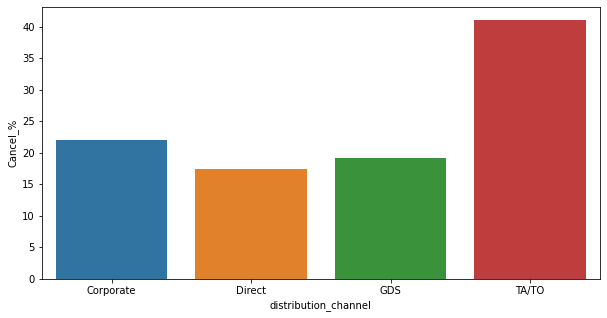

In [ ]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

# **Hotel Wise Analysis** 
#**Q.7 Which room type is is most demand ?**

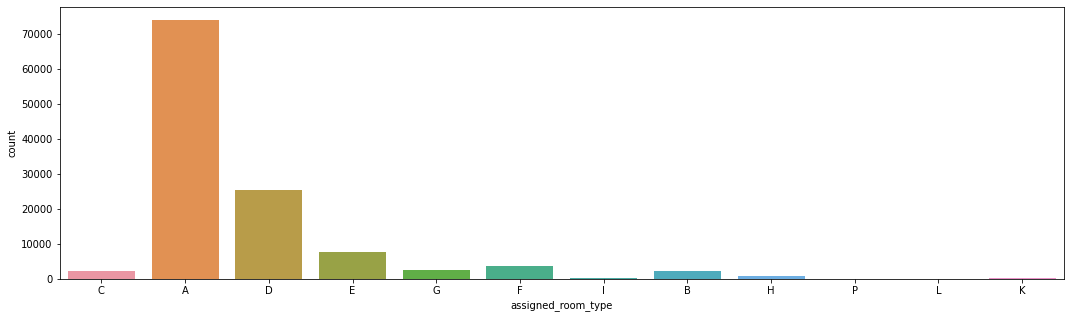

In [ ]:
#Which room type is is most demand ? 
fig, axes=plt.subplots(figsize=(18,5))


grp_by_room=data.groupby('assigned_room_type')
data['num_of_bookings']=grp_by_room.size()

sns.countplot(x=data['assigned_room_type'])
#sns.boxplot(ax=axes[1],x=data['assigned_room_type'],y=data['adr'])
plt.show()


#**Q.8 From which country most guests come?**

In [ ]:
#finding maxiumum booking among all countries
max_all=data.groupby('country')['country'].count().max()

#finding sum
sum_all=data.groupby('country')['country'].count().sum()

#finding percentage of country from most guests come.
percentage_of_prt=max_all*100/sum_all
print("Percentage of country :",round(percentage_of_prt,2),"%" )

Percentage of country : 40.87 %


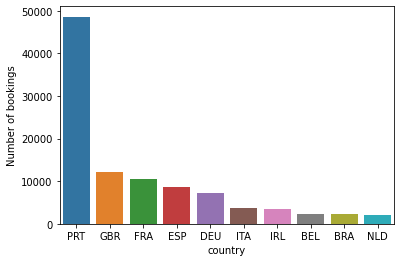

In [ ]:
#groupby country
group_by_country=data.groupby('country')

#getting top 10 values
d2=pd.DataFrame(group_by_country.size()).rename(columns={0:'Number of bookings'}).sort_values('Number of bookings',ascending=False)
d2=d2[:10]

#plotting barplot
sns.barplot(x=d2.index,y=d2['Number of bookings'])
plt.show()

# **Conclusion:**

# **We used the dataset that contains data about hotel bookings**


# **We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the data to answer the following questions.**


# **1.Which type of hotel is most liked by customers ?**


# **2.In which months hotel is more busy ?**


# **3.Which meal type is most preffered meal of customers?**


# **Which is the most common channel for booking hotels?**


# **5.Which channel is mostly used for early booking of hotels?**

# **6.Which significant distribution channel has highest cancellation percentage?**

#**Q.7 Which room type is is most demand ?**

#**Q.8 From which country most guests come?**

# **Above Questions will give you clearity about "Hotel Booking" and we will get clear idea about that.**

#**Higher lead time has higher chance of cancellation.**

#**The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower. Thus, customers can get good deal on bookings in July and August in city hotel.**

#**Arpil to August is the peak season of bookings. Both hotels have the fewest guests during the winter.**


#**Thank You !!**